# Leitura de dados

In [19]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
  
# read text file into pandas DataFrame
df = pd.read_csv('Data/DATA.txt', header=None, delimiter="   ", names=['GENDER', 'AGE', 'RF', 'SBP', 'HR1','ST', 'HR2', 'CRT', 'KIL', 'EVENT'])

/var/folders/ff/k5l3wypj7s1gqw9qq5mly9w80000gn/T/ipykernel_18915/335654115.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Data/DATA.txt', header=None, delimiter="   ", names=['GENDER', 'AGE', 'RF', 'SBP', 'HR1','ST', 'HR2', 'CRT', 'KIL', 'EVENT'])


## Caracterização dos dados

In [20]:
df.head()

,GENDER,AGE,RF,SBP,HR1,ST,HR2,CRT,KIL,EVENT
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0


# Separação dados

In [21]:
X = df.drop('EVENT', axis=1)
y = df['EVENT']

## Divisão train/test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo

## Elbow Method

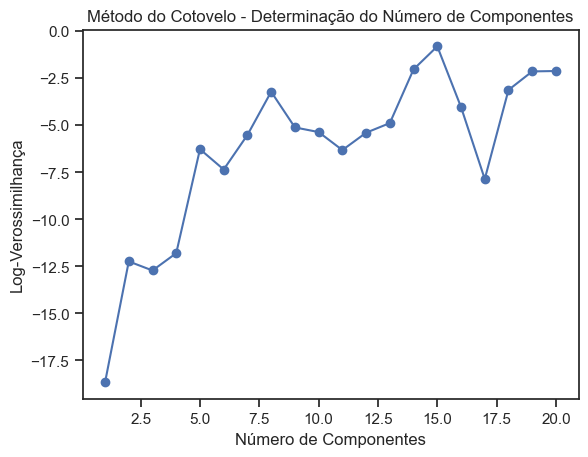

In [23]:
# Definir uma lista de possíveis números de componentes
n_components_range = range(1, 21)

# Inicializar uma lista vazia para armazenar as log-verossimilhanças
log_likelihoods = []

# Ajustar o modelo de mistura gaussiana para cada número de componentes e calcular a log-verossimilhança
for n_components in n_components_range:
    model = GaussianMixture(n_components=n_components)
    model.fit(X)  # X é o seu conjunto de dados
    log_likelihoods.append(model.score(X))

# Plotar a curva do método do cotovelo
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Log-Verossimilhança')
plt.title('Método do Cotovelo - Determinação do Número de Componentes')
plt.show()

## Predição

In [24]:
# Definir os possíveis valores de n_components a serem testados
n_components_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Inicializar listas para armazenar as acurácias e os modelos
accuracies = []
models = []

# Iterar sobre os valores de n_components e ajustar os modelos
for n_components in n_components_values:
    # Inicializar e ajustar o modelo de mistura gaussiana
    model = GaussianMixture(n_components=n_components)
    model.fit(X_train)

    # Prever os rótulos dos dados de teste
    y_pred = model.predict(X_test)

    # Calcular a acurácia da previsão
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    models.append(model)

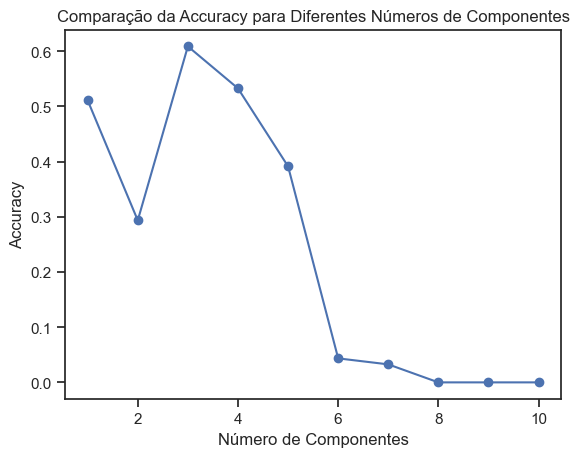

In [25]:
# Plotar o gráfico de comparação das acurácias
plt.plot(n_components_values, accuracies, 'o-')
plt.xlabel('Número de Componentes')
plt.ylabel('Accuracy')
plt.title('Comparação da Accuracy para Diferentes Números de Componentes')
plt.show()

## Plot

## Distrubuição gaussiana entre features definidas e componentes

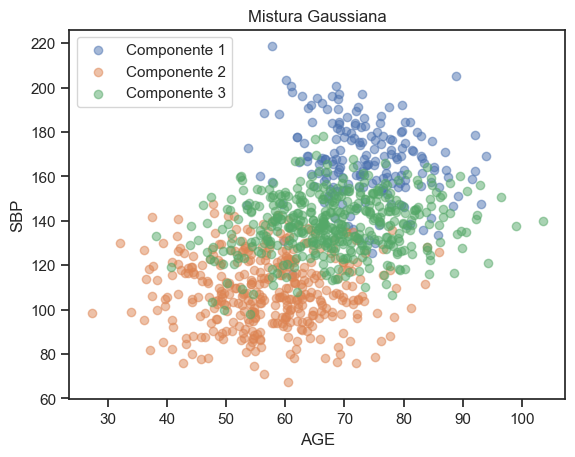

In [26]:

# Separar os dados em atributos (X) e rótulos (y)
X = df[['AGE', 'SBP']]

# Inicializar e ajustar o modelo de mistura gaussiana
n_components = 3 # Definir o número de componentes da mistura (nesse caso, 2)
model = GaussianMixture(n_components=n_components)
model.fit(X)

# Gerar amostras sintéticas da mistura gaussiana
n_samples = 1000
samples, labels = model.sample(n_samples)

# Plotar os dados de cada componente
for i in range(n_components):
    # Obter os pontos gerados pertencentes ao componente atual
    component_samples = samples[labels == i]

    # Plotar os pontos gerados
    plt.scatter(component_samples[:, 0], component_samples[:, 1], alpha=0.5, label=f"Componente {i+1}")

plt.xlabel('AGE')
plt.ylabel('SBP')
plt.legend()
plt.title('Mistura Gaussiana')
plt.show()



## Mistura gaussiana entre todas as features

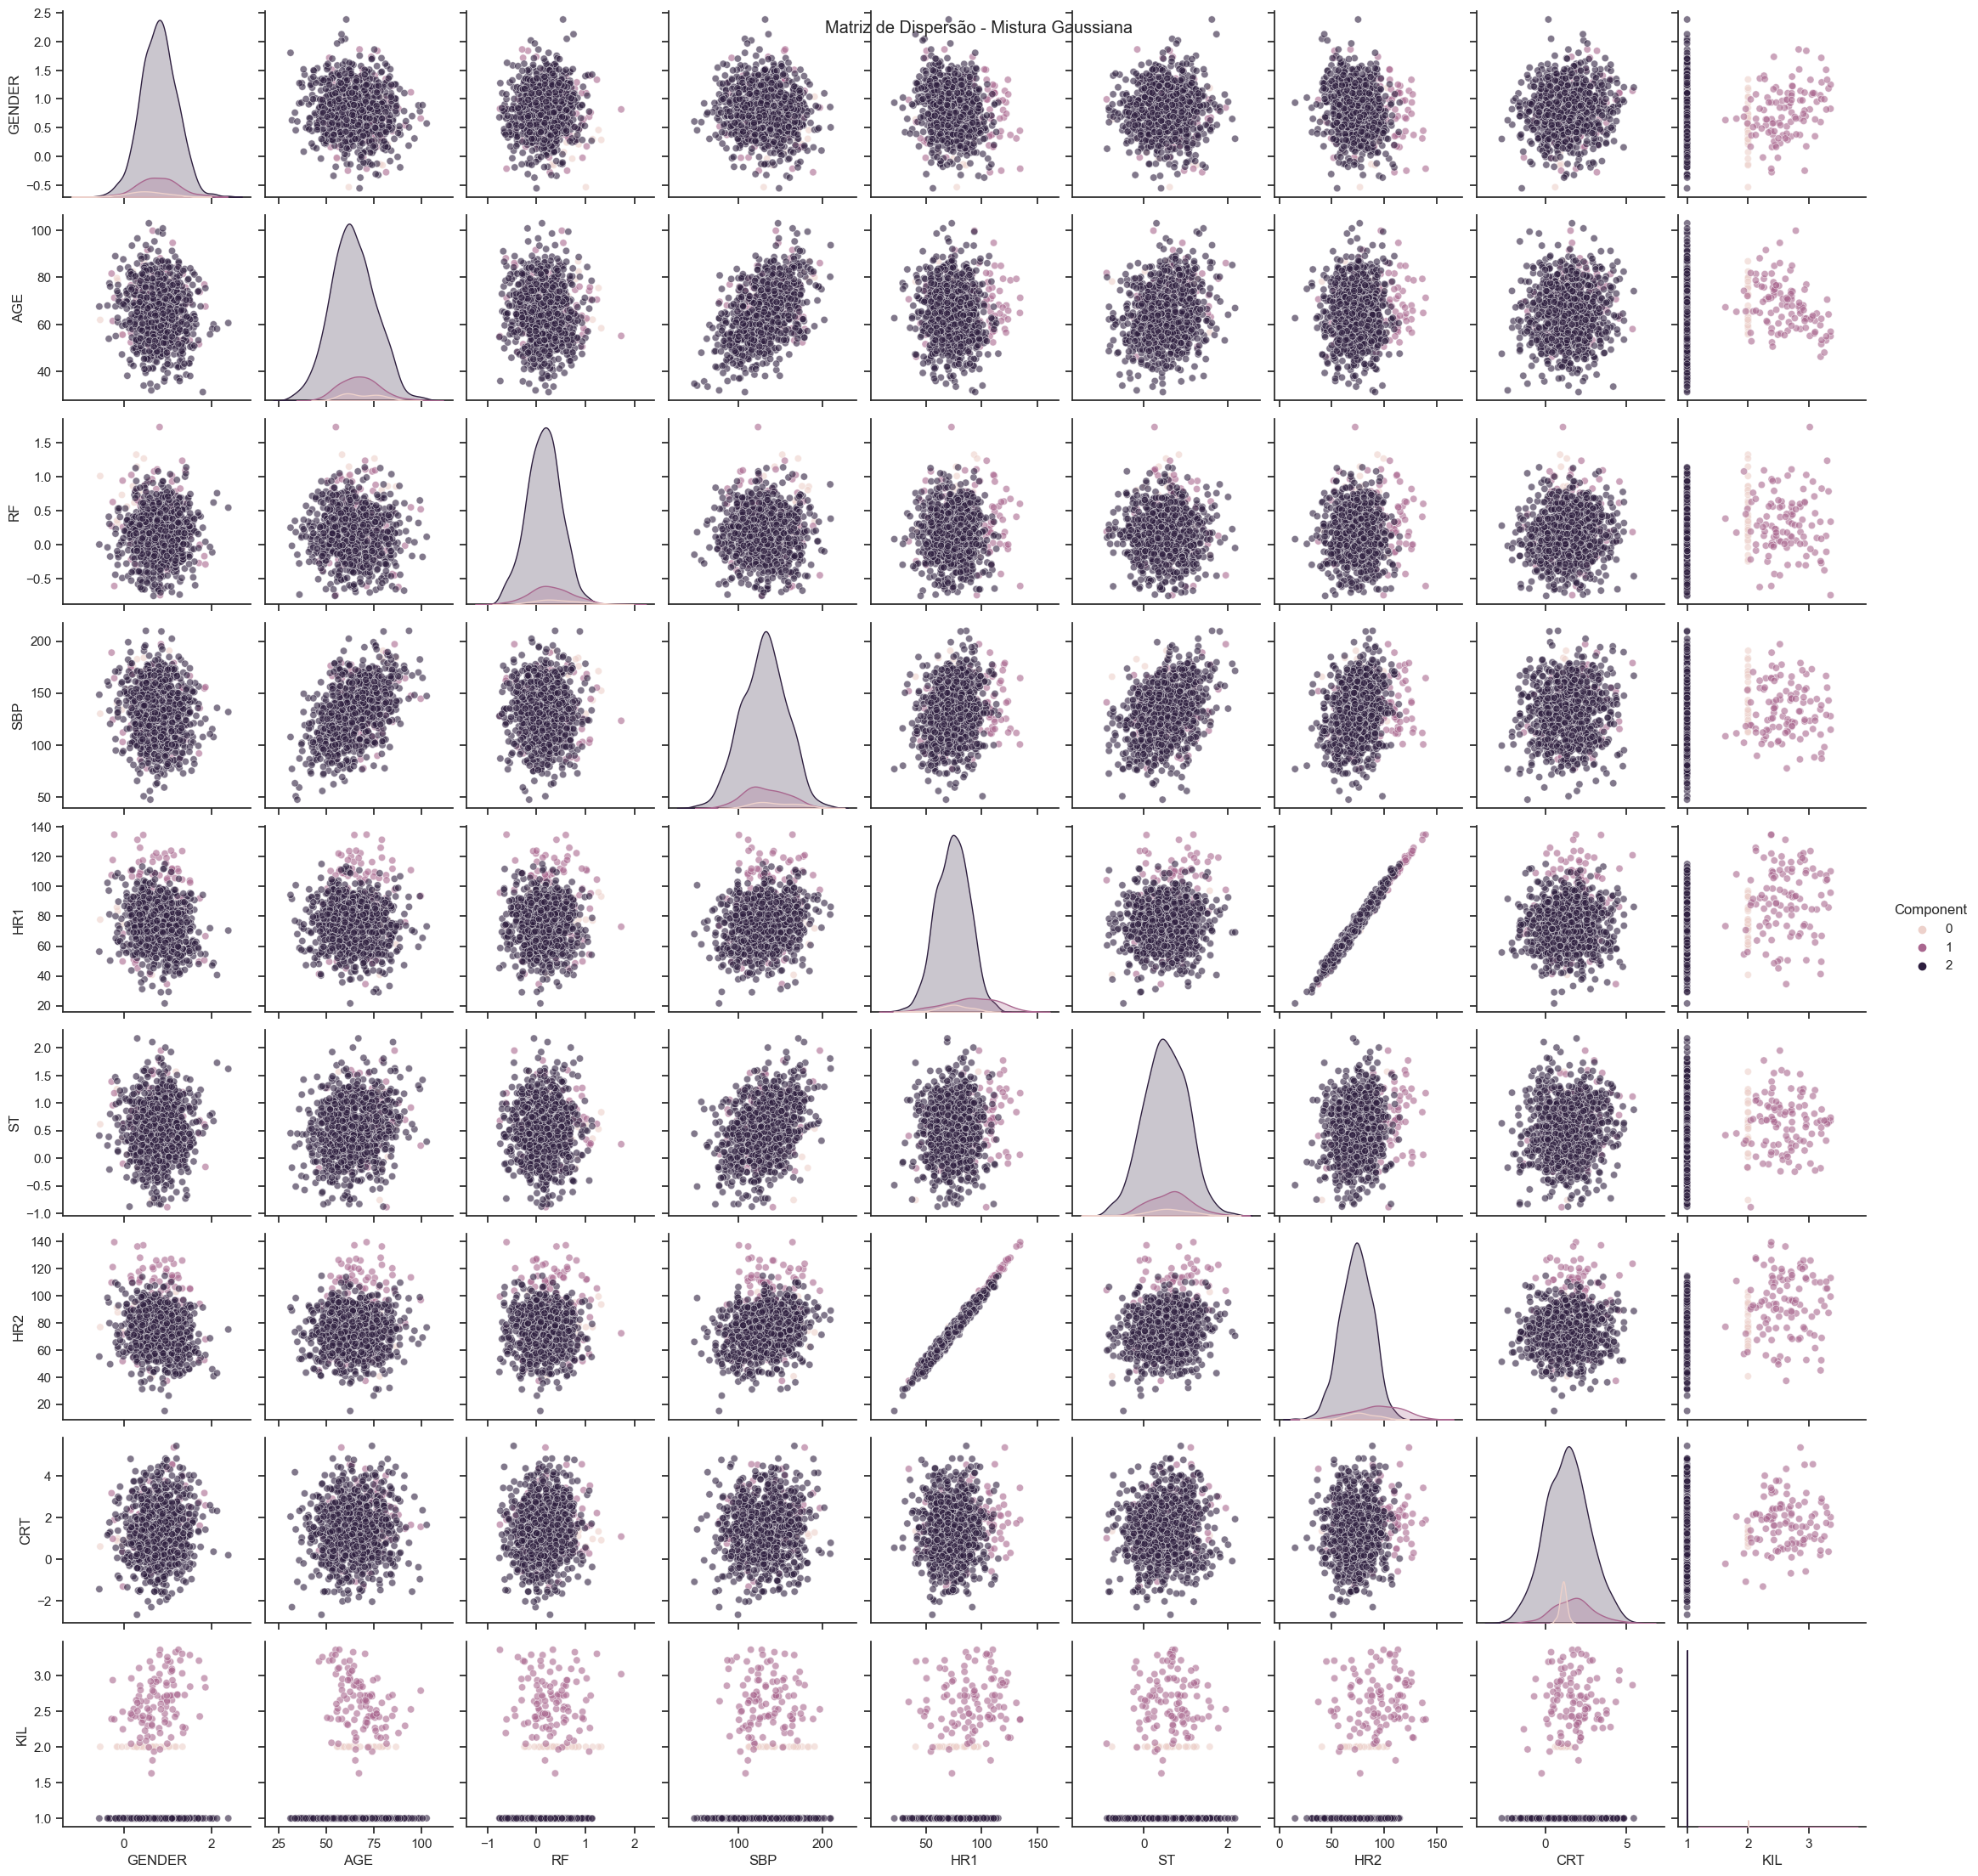

In [27]:

# Separar os dados em atributos (X) e rótulos (y)
X = df.drop('EVENT', axis=1)

# Inicializar e ajustar o modelo de mistura gaussiana
n_components = 3  # Definir o número de componentes da mistura (nesse caso, 2)
model = GaussianMixture(n_components=n_components)
model.fit(X)

# Gerar amostras sintéticas da mistura gaussiana
n_samples = 1000
samples, labels = model.sample(n_samples)

# Criar um DataFrame com as amostras geradas
synthetic_data = pd.DataFrame(samples, columns=X.columns)

# Adicionar o rótulo do componente a cada amostra gerada
synthetic_data['Component'] = labels

# Plotar a matriz de dispersão
sns.set(style="ticks")
sns.pairplot(synthetic_data, hue='Component', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Matriz de Dispersão - Mistura Gaussiana')
plt.show()


Neste exemplo, usamos o seaborn para criar a matriz de dispersão. Cada gráfico de dispersão representa a relação entre duas features do conjunto de dados, e os pontos são coloridos de acordo com o componente da mistura gaussiana a que pertencem.

A diagonal principal da matriz mostra os histogramas estimados (densidades de probabilidade) de cada feature, com base nas amostras geradas pela mistura gaussiana.

Ao explorar a matriz de dispersão, você pode observar padrões de agrupamento ou sobreposição entre as features e identificar a relação entre elas dentro de cada componente da mistura gaussiana. Isso pode fornecer insights sobre a estrutura e a natureza dos seus dados.

Lembre-se de adaptar o código ao seu conjunto de dados, garantindo que as colunas relevantes estejam incluídas e que o número de componentes e o estilo de plotagem sejam ajustados de acordo com as suas necessidades.